In [3]:
import sys
sys.path.insert(0, r"C:\Users\pedro\edge-rppg-health")  # ensure project root is first on sys.path
import importlib
importlib.invalidate_caches()  
import pandas as pd

In [2]:
from IppgSignalObtainer import IppgSignalObtainer
import matplotlib.pyplot as plt
#from Tools.ParametersCalculator import ParametersCalculator

In [4]:
path = "videos_iPPG_paula/2024-11-28 at 10.06.20.mp4"   
rois = IppgSignalObtainer.extractSeriesRoiRGBFromVideo(path, 30, 30, 0, True, True, False, False)

forehead ========================================================================
left_cheek ========================================================================
right_cheek ========================================================================


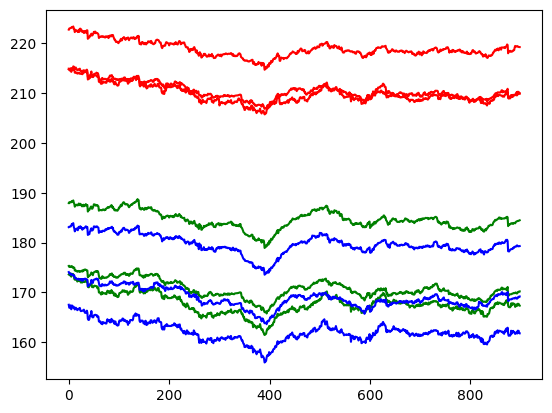

In [16]:
for roi in rois:
    print(f"{roi} ========================================================================")
    for channel in rois[roi]:
        plt.plot(rois[roi][channel], color = channel)
    #plt.show()

In [ ]:
pd.read_csv("results_roi_hr.csv", header=None)

,0,1,2,3,4,5,6
0,file,best_roi,hr,gt_hr,error_for_roi_forehead,error_for_roi_left_cheek,error_for_roi_right_cheek
1,20241203_152904.mp4,right_cheek,98.4375,95.0,24.6875,3.59375,3.4375
2,20241203_111907.mp4,left_cheek,91.40625,52.0,25.34375,39.40625,2.78125
3,2024-11-28 at 10.06.20.mp4,forehead,84.375,85.0,0.625,0.625,14.6875
4,2024-11-28 at 10.10.37.mp4,left_cheek,77.34375,95.0,3.4375,17.65625,10.625
5,2024-11-28 at 10.16.37.mp4,right_cheek,119.53125,68.0,2.3125,30.4375,51.53125
6,2024-11-28 at 10.32.50.mp4,right_cheek,70.3125,75.0,4.6875,4.6875,4.6875
7,2024-11-28 at 10.34.52.mp4,left_cheek,70.3125,69.0,1.3125,1.3125,8.34375
8,2024-11-28 at 11.54.15.mp4,left_cheek,70.3125,90.0,19.6875,19.6875,1.40625
9,2024-11-28 at 16.13.38.mp4,left_cheek,91.40625,68.0,4.71875,23.40625,2.3125


## Analisis de los graficos de los periodogramas: 

En los videos del motorola G72, NO se ve el pico cercano a 1Hz que se ve por ej en el S24

## Analisis seleccion automatica de ROI

En muchos casos puede verse que se consiguieron bajos errores para alguna de las ROIs en especifico, mostrando la importancia de la seleccion dinamica de las mismas. Sin embargo, en la mayor parte de los casos el metodo de seleccion basado unicamente en la energia no dio resultados satisfactorios, dligiendo ROIs con errores muy altos por sobre ROIs con errores bajos.

En base a esto se procedera a hacer dos cosas:
1- Probar distintos metodos y ver la diferencia
2- Probar distintos criterios para la seleccion de ROIs, como por ejemplo el SNR, indices de calidad, o la combinacion de este con el.
3- Testear en videos obtenidos con webcam (sin post procesamiento) y ver si el problema radica en el postprocesamientod e los celulares


## Analisis

### Distintos Metodos

In [5]:
# Load results_all_methods_comparison.csv and separate by method
df_all_methods = pd.read_csv("results_all_methods_comparison.csv")

# Function to find the ROI with minimum error
def find_min_error_roi(row):
    error_cols = {
        'forehead': row['error_for_roi_forehead'],
        'left_cheek': row['error_for_roi_left_cheek'],
        'right_cheek': row['error_for_roi_right_cheek']
    }
    min_roi = min(error_cols, key=error_cols.get)
    return min_roi

# Add column to check if best_roi matches the ROI with lowest error
df_all_methods['min_error_roi'] = df_all_methods.apply(find_min_error_roi, axis=1)
df_all_methods['best_roi_is_correct'] = df_all_methods['best_roi'] == df_all_methods['min_error_roi']
df_all_methods['✓'] = df_all_methods['best_roi_is_correct'].map({True: '✓', False: ''})

# Separate dataframe by method
methods = df_all_methods['method'].unique()
dfs_by_method = {}

for method in methods:
    dfs_by_method[method] = df_all_methods[df_all_methods['method'] == method].copy()
    print(f"\n=== {method.upper()} Method ({len(dfs_by_method[method])} rows) ===")
    print(dfs_by_method[method])
    
# The separate dataframes are stored in dfs_by_method dictionary
# Access them like: dfs_by_method['pos'], dfs_by_method['chrom'], etc.


=== POS Method (19 rows) ===
   method                        file     best_roi         hr  gt_hr  \
0     pos         20241203_152904.mp4  right_cheek   98.43750   95.0   
4     pos         20241203_111907.mp4  right_cheek   91.40625   52.0   
8     pos  2024-11-28 at 10.06.20.mp4     forehead   84.37500   85.0   
12    pos  2024-11-28 at 10.10.37.mp4   left_cheek   84.37500   95.0   
16    pos  2024-11-28 at 10.16.37.mp4  right_cheek   77.34375   68.0   
20    pos  2024-11-28 at 10.32.50.mp4   left_cheek   70.31250   75.0   
24    pos  2024-11-28 at 10.34.52.mp4   left_cheek   70.31250   69.0   
28    pos  2024-11-28 at 11.54.15.mp4   left_cheek   70.31250   90.0   
32    pos  2024-11-28 at 16.13.38.mp4   left_cheek   91.40625   68.0   
36    pos  2024-11-28 at 16.19.35.mp4   left_cheek   84.37500   56.0   
40    pos  2024-11-28 at 16.20.48.mp4  right_cheek   84.37500   60.0   
44    pos  2024-11-28 at 16.26.58.mp4   left_cheek   77.34375   65.0   
48    pos  2024-12-03 at 13.08.04.

asd